In [1]:
from allthethings import PyNetwork
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:

fi = "indata/3pipes1.inp"     #location of .inp file
fc = "indata/3pipes1.config"  #location of .config file
mtype = 1                     #model used along network edges. 1 for Preissman Slot. 0 for uniform
n1 = PyNetwork(fi, fc, mtype) #a network object
print n1 
n1.showLayout()               #print the layout of the network
print n1.a

Network at address 0x1022631d0 with 4 nodes and 3 edges

   pipe | start node | end node
-----------------------------------
     0  |  0         | 1
     1  |  1         | 2
     2  |  1         | 3


   node | #incoming pipes
-------------------------
  0     |  1
  1     |  3
  2     |  1
  3     |  1
[12.0, 12.0, 12.0]


In [3]:
#n1.showCurrentData()      #show the values of dynamical variables in each pipe
q0 = np.random.rand(n1.Ns[1]);
a0 = np.zeros(n1.Ns[1])
#print n1.Ns
n1.setIC(1,q0,a0)
#n1.showCurrentData()

In [4]:
#from udacity tutorial https://www.udacity.com/wiki/creating-network-graphs-with-python
def draw_graph(graph):

    # extract nodes from graph
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])

    # create networkx graph
    G=nx.Graph()

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # draw graph
    pos = nx.shell_layout(G)
    nx.draw(G, pos)

    # show graph
    plt.show()

 

[(0, 1), (1, 2), (1, 3)]


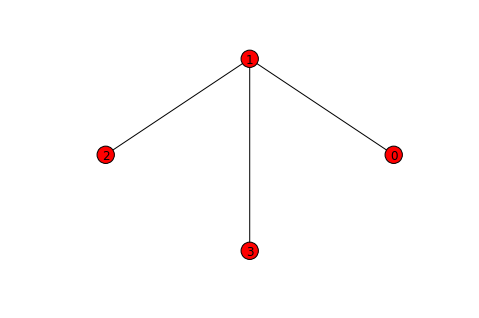

In [9]:
G = [(n1.conn[i][0], n1.conn[i][1]) for i in range(n1.Nedges)]
print G
draw_graph(G)

0.0666666666667


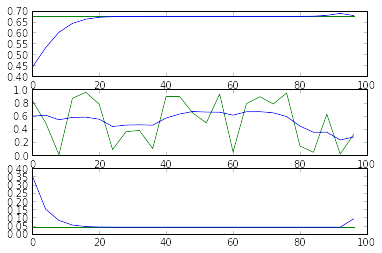

In [10]:
V0 = n1.getTotalVolume()
qi = [n1.q(i) for i in range(n1.Nedges)]  #this is a list of np.ndarrays pointing to underlying pipe data(!)
fig,ax = plt.subplots(nrows = n1.Nedges)
for k in range(n1.Nedges):
    x = np.arange(0,n1.Ls[k], n1.Ls[k]/n1.Ns[k])
    ax[k].plot(x,qi[k][0:n1.Ns[k]],'g')
dt = n1.T/n1.M
print dt
n1.runForwardProblem(dt)  #solve up to time T
for k in range(n1.Nedges):
    x = np.arange(0,n1.Ls[k], n1.Ls[k]/n1.Ns[k])
    ax[k].plot(x,qi[k][0:n1.Ns[k]],'b')
plt.show()


0.00666666666667


In [11]:
#n1.showCurrentData()
print "Initial Volume is %f"%V0
print "Final Volume is   %f" %n1.getTotalVolume()

Initial Volume is 124.412894
Final Volume is   124.412906
